In [1]:
import random, matplotlib.pyplot as plt, numpy as np
myFile = open("hw1a.txt",'r')
plt.rcParams['figure.figsize'] = [13, 10]
entries = myFile.readlines()

In [2]:
def selectfirstk(entries, k):
    selection = []
    for i in range(k):
        selection += [float(entries[i])]
    return np.average(np.array(selection))

def selectfromapoint(entries,m,k):
    selection = []
    count = 0
    while(count < k):
        currentIndex = (m + count) % len(entries)
        selection += [float(entries[currentIndex])]
        count += 1
    return np.average(np.array(selection))

def selectrandomly(entries,k):
    selection = []
    alreadySelected = []
    count = 0
    while(count < k):
        randomno = random.randint(0,9999)
        if(randomno not in alreadySelected):
            selection += [float(entries[randomno])]
            count += 1
            alreadySelected += [randomno]
    return np.average(np.array(selection))

The Three Plots for K = 10


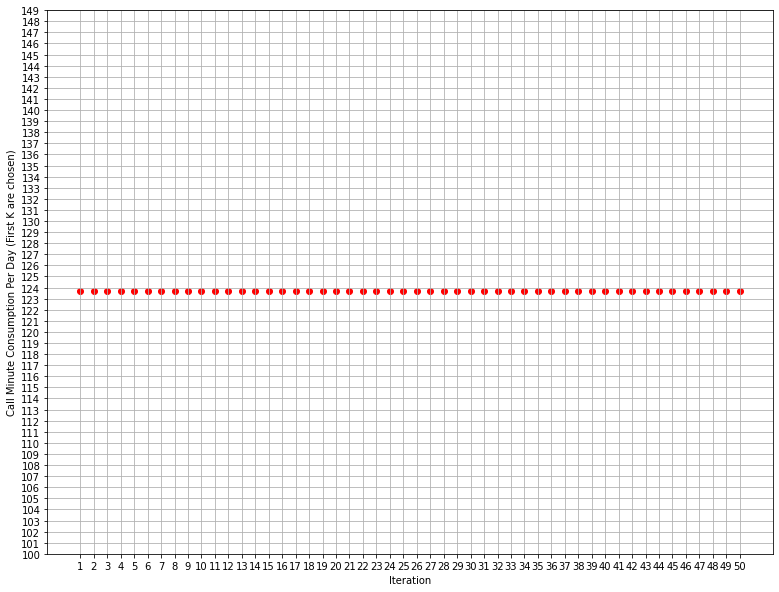

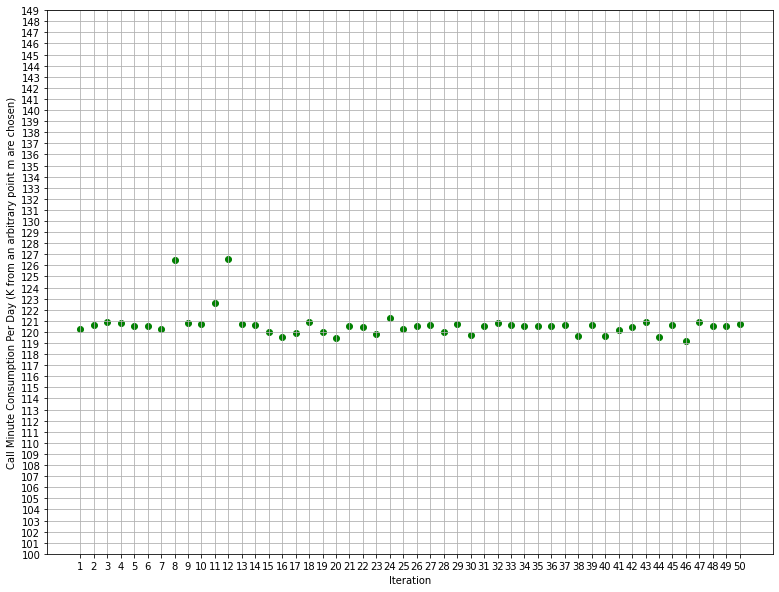

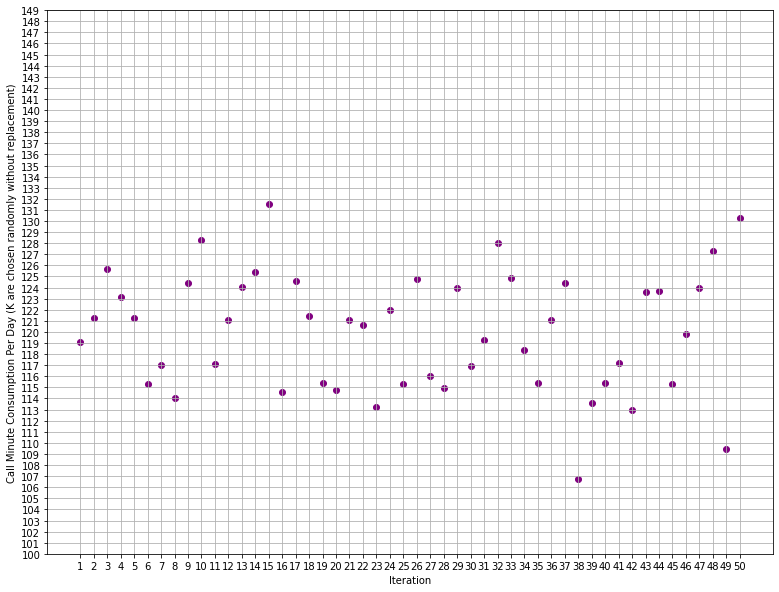

The Three Plots for K = 20


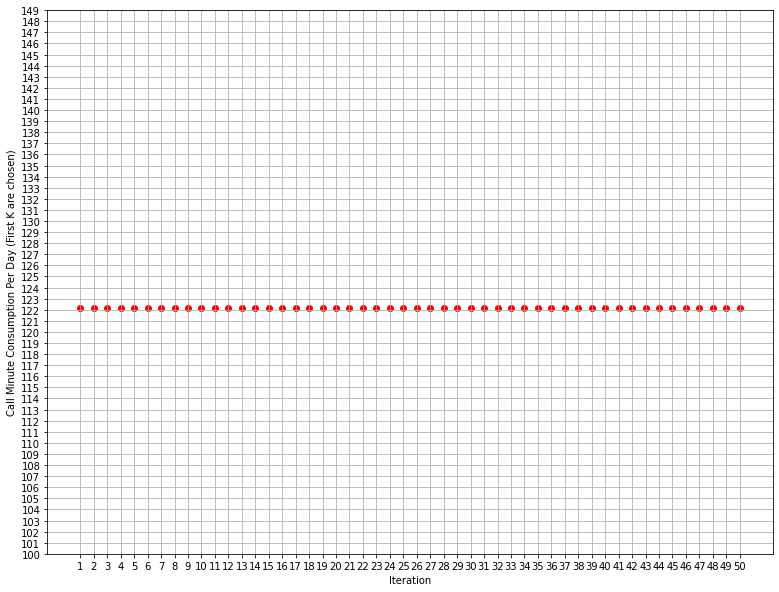

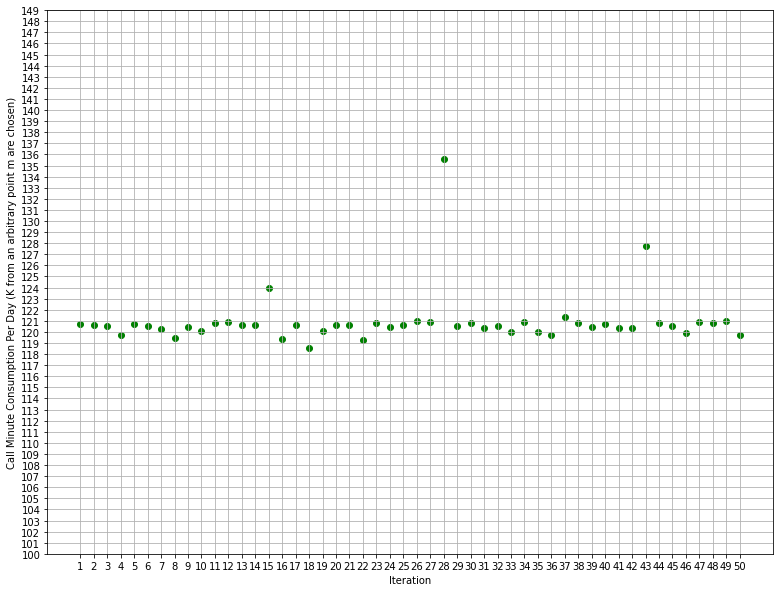

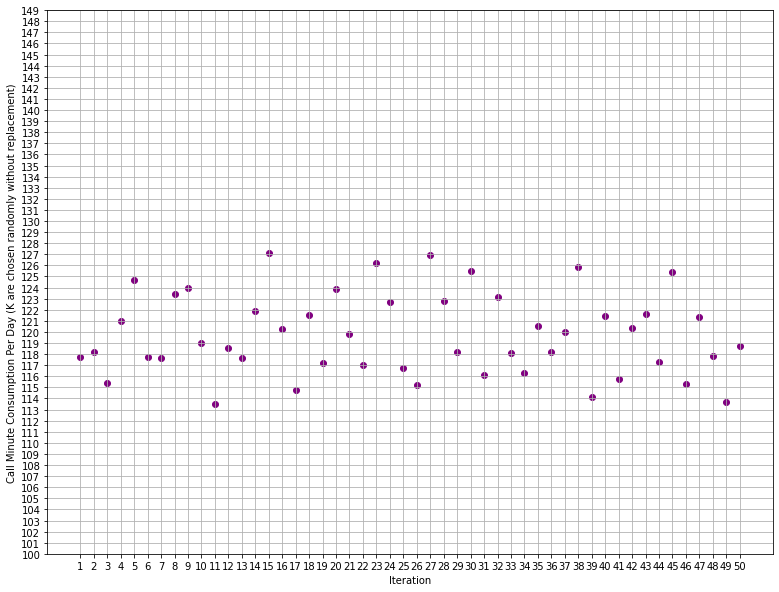

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The Three Plots for K = 50


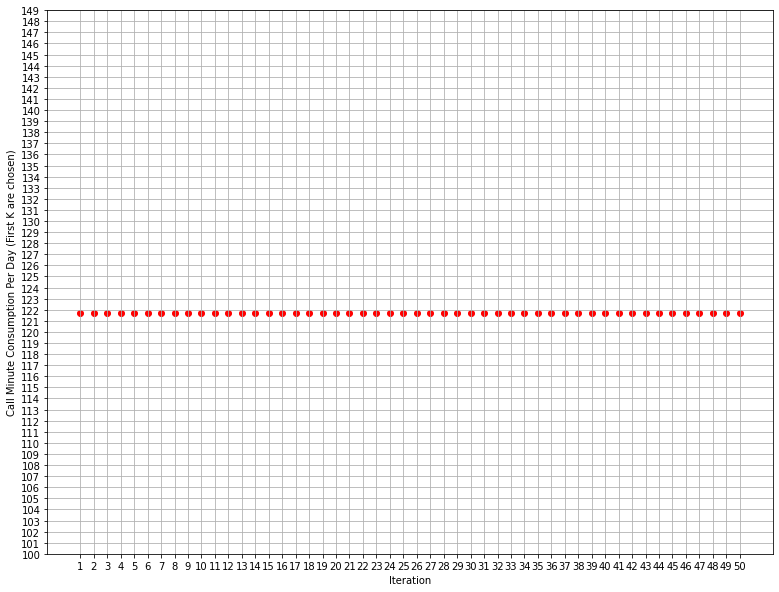

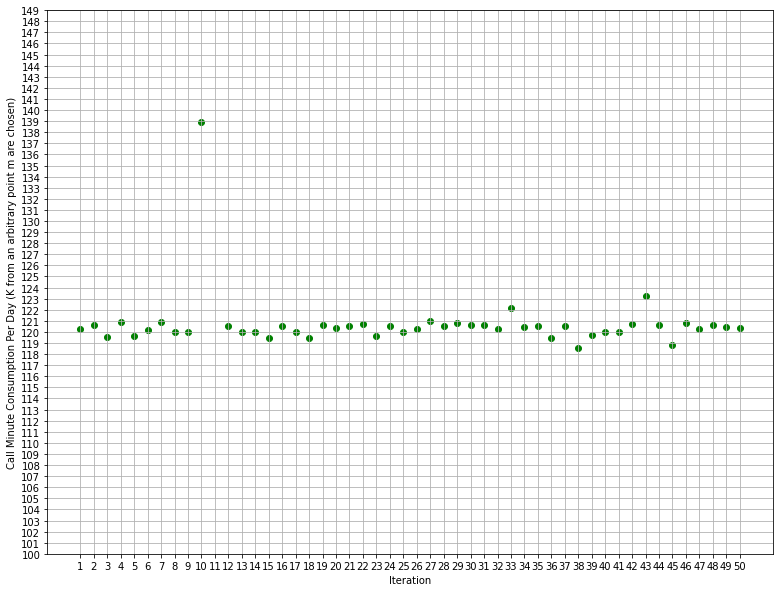

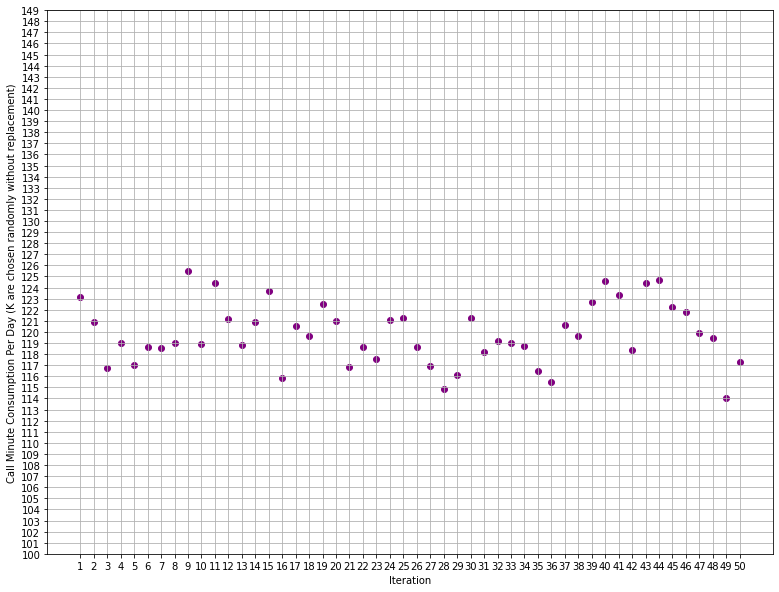

The Three Plots for K = 100


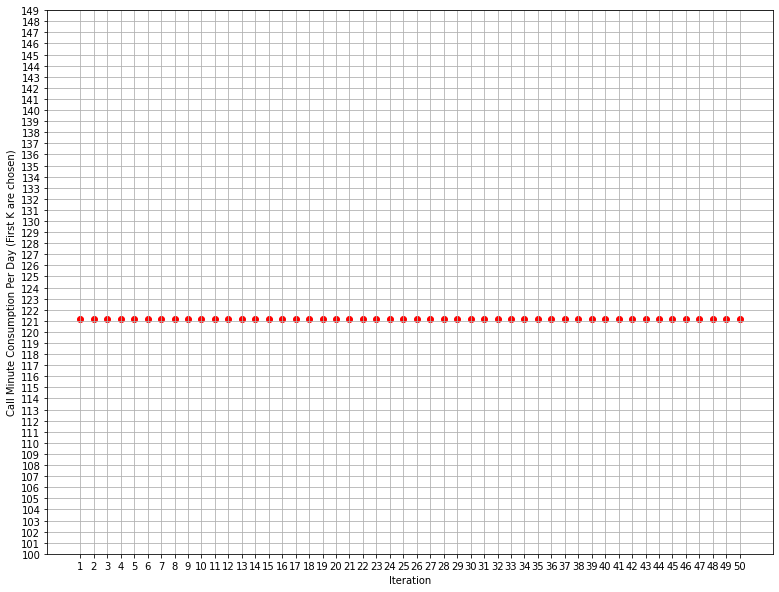

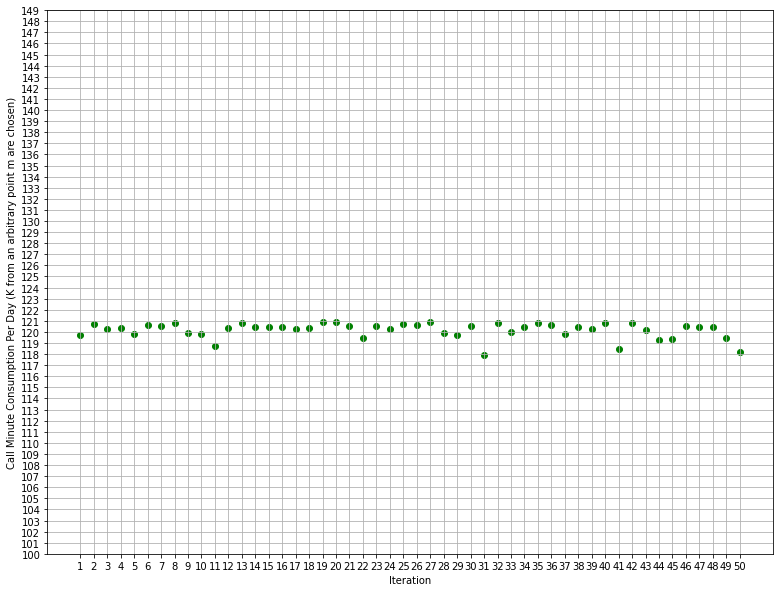

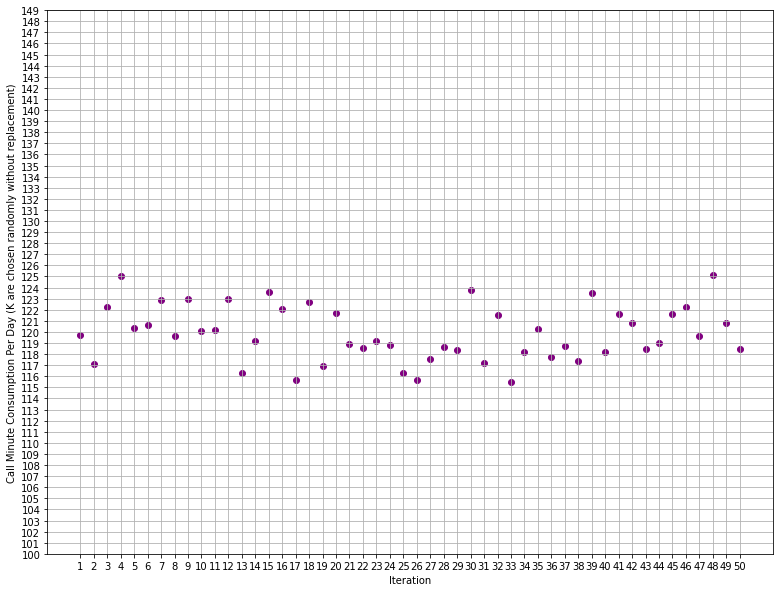

The Three Plots for K = 200


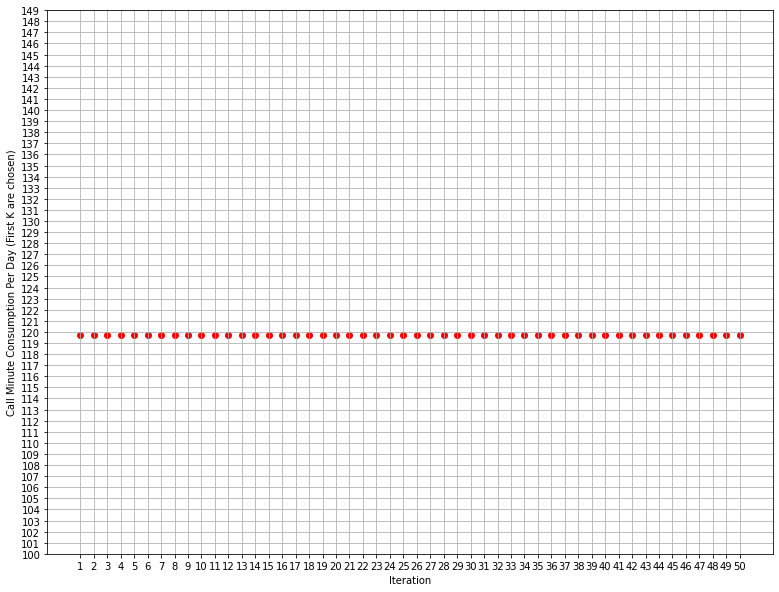

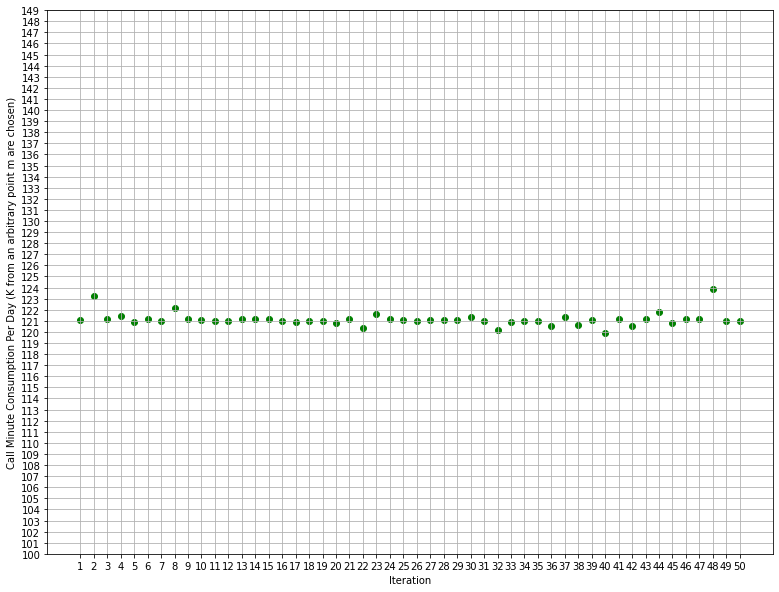

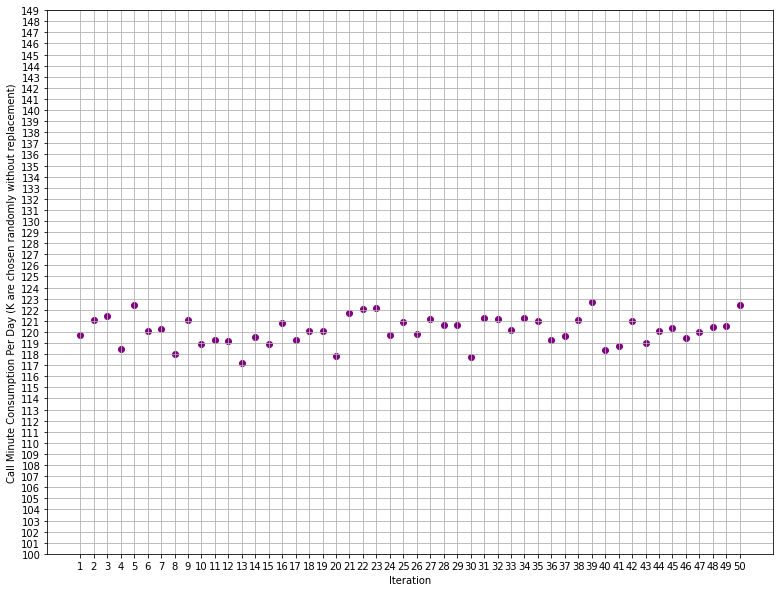

In [3]:
for k in [10,20,50,100,200]:
    selectfirstk_averages = []
    selectfromapoint_averages = []
    selectrandomly_averages = []
    for i in range(50):
        selectfirstk_averages += [selectfirstk(entries,k)]
    for i in range(50):
        m = random.randint(0,999)
        selectfromapoint_averages += [selectfromapoint(entries,k,m)]
    for i in range(50):
        selectrandomly_averages += [selectrandomly(entries,k)]
    
    print("The Three Plots for K = "+str(k))
    plt.grid()
    plt.scatter(range(1,51), selectfirstk_averages, color="red")
    plt.xlabel("Iteration")
    plt.ylabel("Call Minute Consumption Per Day (First K are chosen)")
    plt.ylim(100,140)
    plt.yticks(np.arange(100,150,1))
    plt.xticks(range(1,51))
    plt.show()
    plt.grid()
    plt.scatter(range(1,51), selectfromapoint_averages, color="green")
    plt.ylim(100,140)
    plt.yticks(np.arange(100,150,1))
    plt.xticks(range(1,51))
    plt.xlabel("Iteration")
    plt.ylabel("Call Minute Consumption Per Day (K from an arbitrary point m are chosen)")
    plt.show()
    plt.grid()
    plt.scatter(range(1,51), selectrandomly_averages, color="purple")
    plt.ylim(100,140)
    plt.yticks(np.arange(100,150,1))
    plt.xticks(range(1,51))
    plt.xlabel("Iteration")
    plt.ylabel("Call Minute Consumption Per Day (K are chosen randomly without replacement)")
    plt.show()

In [4]:
print("Chosen K is thus 200")

print("Average by method 1:", np.average(np.array(selectfirstk_averages)))
print("Average by method 2:", np.average(np.array(selectfromapoint_averages)))
print("Average by method 3:", np.average(np.array(selectrandomly_averages)))

Chosen K is thus 200
Average by method 1: 119.70603123904553
Average by method 2: 121.13382602925212
Average by method 3: 120.16276544118942


In [5]:
#for total average
y = [float(i) for i in entries]
x = np.array(y)
print("The actual average of data is:",np.average(x))
print("The actual stdev of data is:",np.std(x))

The actual average of data is: 120.13317118090191
The actual stdev of data is: 19.975538382855223
